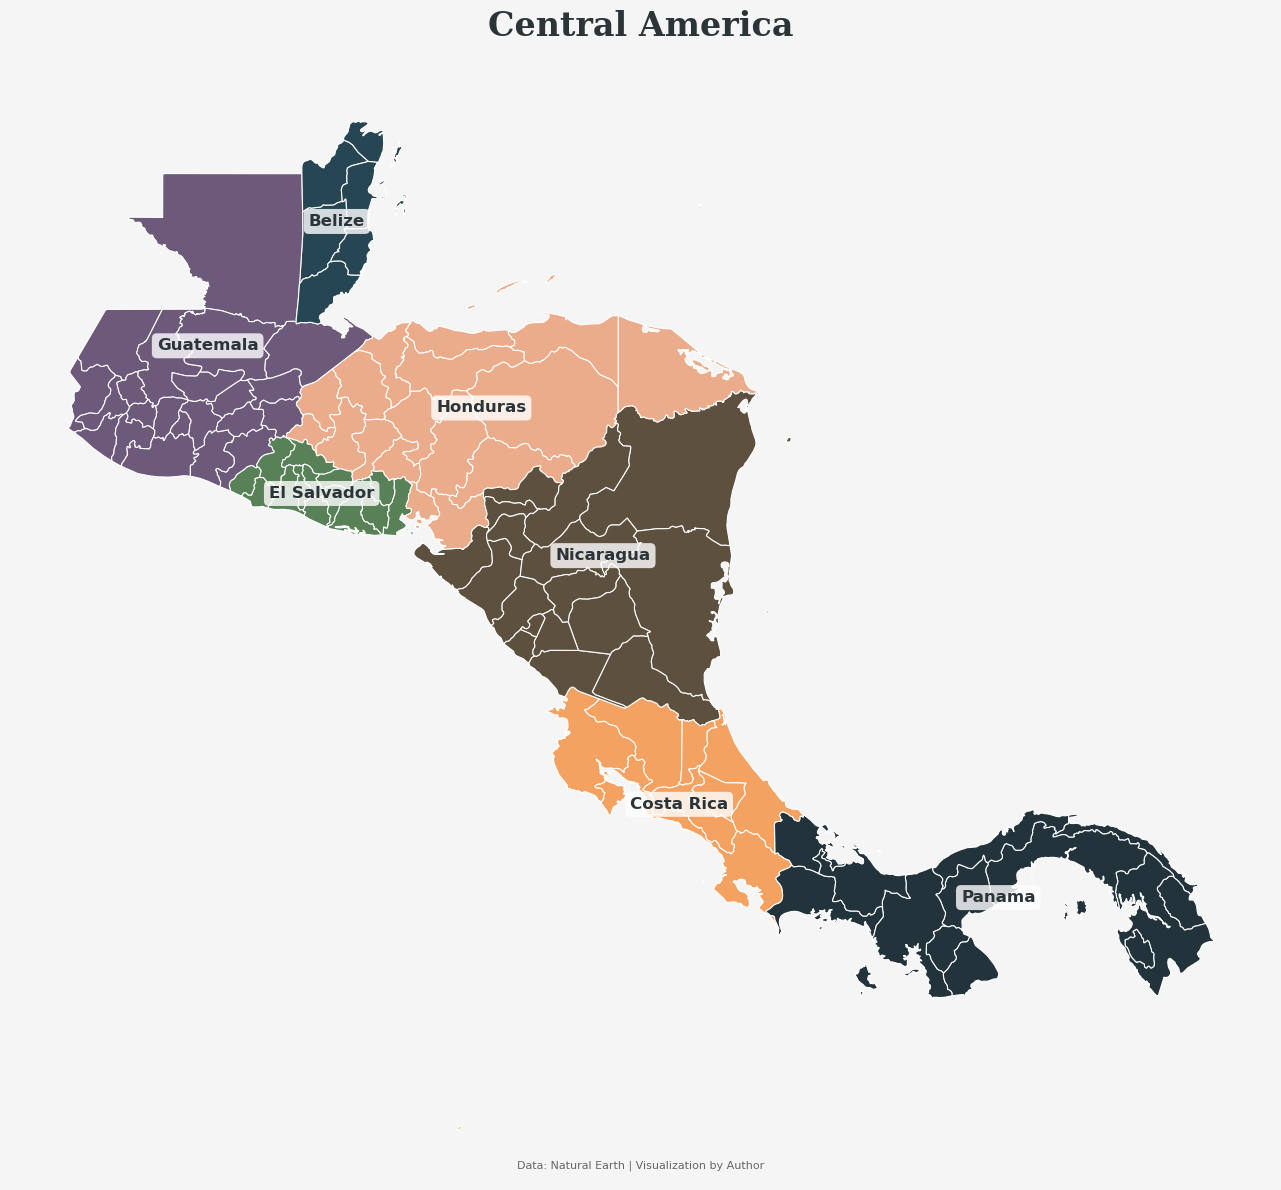

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from shapely.geometry import MultiPolygon
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="pyproj")

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)

central_america = admin1[admin1['admin'].isin(['Panama', 'Costa Rica', 'Nicaragua', 
                                              'Honduras', 'El Salvador', 'Guatemala', 'Belize'])]
central_america = central_america.to_crs("EPSG:4326")

colors = [
    "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",  
    "#3a5a78", "#588157", "#a3b18a", "#344e41",  
    "#6d597a", "#b56576", "#e56b6f", "#eaac8b", "#355070",  
    "#6b9080", "#5e503f", "#c6ac8f", "#22333b"
]

fig, ax = plt.subplots(figsize=(14, 12))

central_america.plot(
    ax=ax,
    column='admin',  
    cmap=mcolors.ListedColormap(colors),
    edgecolor='white',
    linewidth=0.8,
    legend=False
)

def get_country_center(gdf, country):
    country_geom = gdf[gdf['admin'] == country].unary_union
    
    if country_geom.geom_type == 'MultiPolygon':
        largest_poly = max(country_geom.geoms, key=lambda p: p.area)
        return largest_poly.centroid
    return country_geom.centroid

label_positions = {
    'Belize': (-88.7, 17.2),
    'Guatemala': (-90.4, 15.6),
    'Honduras': (-86.8, 14.8),
    'El Salvador': (-88.9, 13.7),
    'Nicaragua': (-85.2, 12.9),
    'Costa Rica': (-84.2, 9.7),
    'Panama': (-80.0, 8.5)
}

for country in central_america['admin'].unique():
    if country in label_positions:
        x, y = label_positions[country]
    else:
        center = get_country_center(central_america, country)
        x, y = center.x, center.y
    
    ax.text(
        x, y, country,
        fontsize=12,
        ha='center',
        va='center',
        fontfamily='sans-serif',
        fontweight='bold',
        color='#2a3439',  
        bbox=dict(
            facecolor='white',
            alpha=0.8,
            edgecolor='none',
            boxstyle='round,pad=0.3'
        )
    )

fig.patch.set_facecolor('#f5f5f5')  
ax.set_facecolor('#f5f5f5')  

ax.set_title(
    'Central America',
    fontsize=24,
    pad=25,
    fontweight='bold',
    color='#2a3439',
    fontfamily='serif'
)

ax.text(
    0.5, 0.01,
    'Data: Natural Earth | Visualization by Author',
    transform=ax.transAxes,
    fontsize=8,
    color='#666666',
    ha='center',
    fontfamily='sans-serif',
    bbox=dict(
        facecolor='#f5f5f5',
        alpha=0.8,
        edgecolor='none',
        pad=4
    )
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [15]:
import folium
import geopandas as gpd
import random

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)

countries = ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama']
central_america = admin1[admin1['admin'].isin(countries)]

central_america = central_america.to_crs("EPSG:4326")

colors = [
    "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",  
    "#3a5a78", "#588157", "#a3b18a", "#344e41",  
    "#6d597a", "#b56576", "#e56b6f", "#eaac8b", "#355070",  
    "#6b9080", "#5e503f", "#c6ac8f", "#22333b"
]

random.shuffle(colors)

m = folium.Map(
    location=[9.2, -82.5],  
    zoom_start=6,
    tiles='CartoDB positron'  
)

for idx, country in enumerate(countries):
    country_data = central_america[central_america['admin'] == country]
    
    folium.GeoJson(
        country_data,
        name=f'{country} Provinces',
        style_function=lambda feature, idx=idx: {
            'fillColor': colors[idx % len(colors)],
            'color': 'white',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=folium.features.GeoJsonTooltip(
            fields=['name', 'type'],
            aliases=['Name:', 'Type:'],
            localize=True
        )
    ).add_to(m)

guatemala_data = central_america[central_america['admin'] == 'Guatemala']
panama_data = central_america[central_america['admin'] == 'Panama']

folium.GeoJson(
    guatemala_data,
    name="Guatemala",
    style_function=lambda feature: {
        'fillColor': "#8338ec",  
        'color': 'white',
        'weight': 1,
        'fillOpacity': 0.7
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name', 'type'],
        aliases=['Name:', 'Type:'],
        localize=True
    )
).add_to(m)

folium.Marker(
    location=[15.5, -90.5], 
    popup="Guatemala",
    icon=folium.Icon(color='purple', icon='info-sign')
).add_to(m)

folium.GeoJson(
    panama_data,
    name="Panama",
    style_function=lambda feature: {
        'fillColor': "#3a86ff",  
        'color': 'white',
        'weight': 1,
        'fillOpacity': 0.7
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name', 'type'],
        aliases=['Name:', 'Type:'],
        localize=True
    )
).add_to(m)

folium.Marker(
    location=[8.5, -80.0],  
    popup="Panama",
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(m)

folium.LayerControl().add_to(m)

m

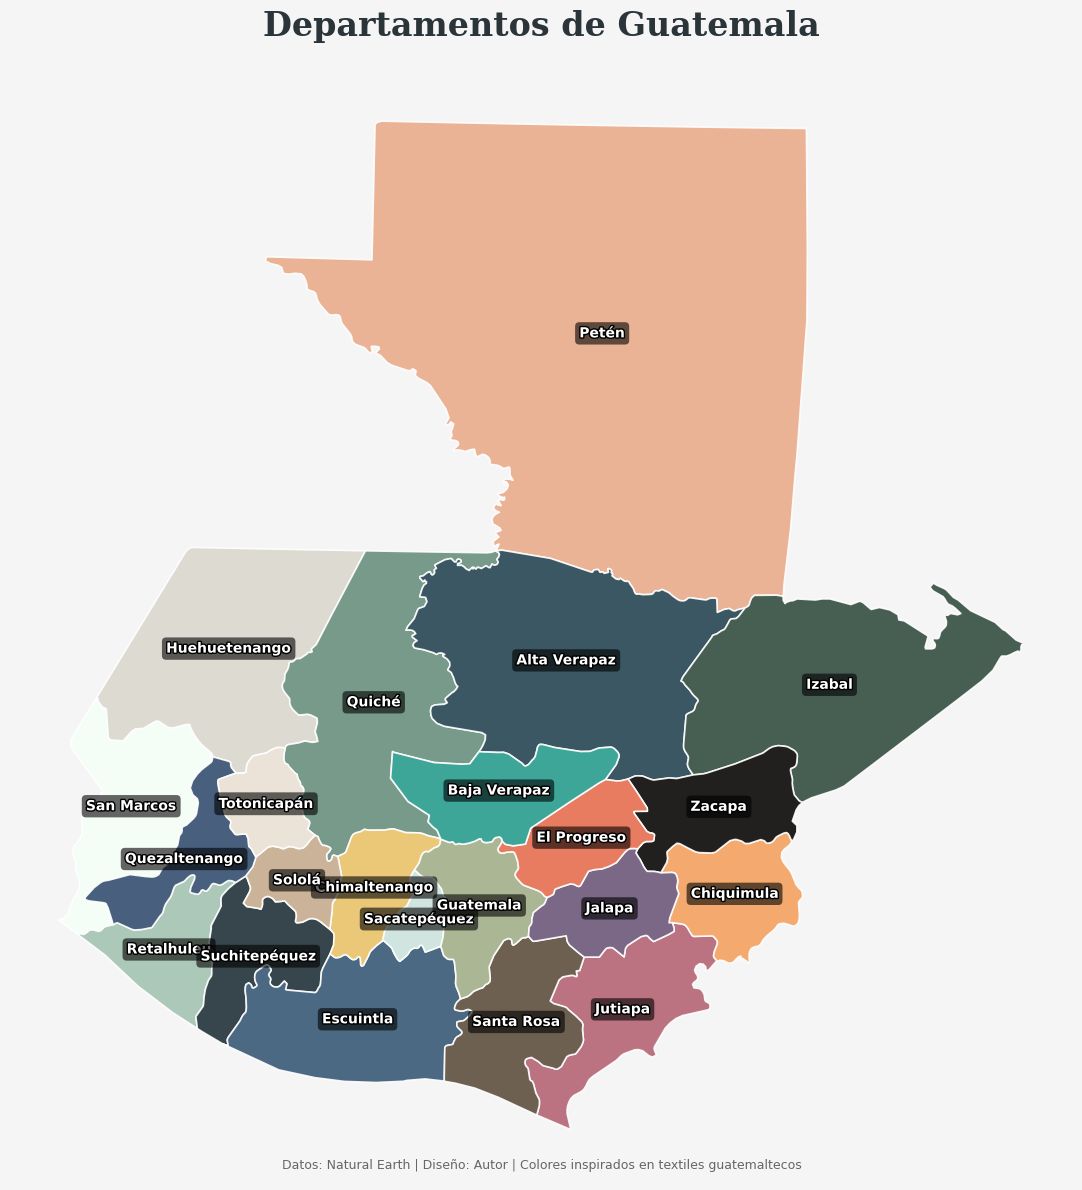

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects
import numpy as np

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)

guatemala = admin1[admin1['admin'] == 'Guatemala']

guatemala = guatemala.to_crs("EPSG:32616")

fig, ax = plt.subplots(figsize=(14, 12))

colors = [
    "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",
    "#3a5a78", "#588157", "#a3b18a", "#dad7cd", "#344e41",
    "#6d597a", "#b56576", "#e56b6f", "#eaac8b", "#355070",
    "#6b9080", "#a4c3b2", "#cce3de", "#eaf4f4", "#f6fff8",
    "#5e503f", "#c6ac8f", "#22333b", "#eae0d5", "#0a0908"
]

cmap = mcolors.ListedColormap(colors)

guatemala.plot(
    ax=ax,
    column='name',
    cmap=cmap,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.9,
    categorical=True,
    legend=False
)

for x, y, label in zip(guatemala.geometry.centroid.x,
                       guatemala.geometry.centroid.y,
                       guatemala['name']):
    ax.text(
        x, y, label,
        fontsize=10,
        ha='center',
        va='center',
        fontfamily='sans-serif',
        fontweight='bold',
        color='white',
        bbox=dict(
            facecolor='black',
            alpha=0.6,
            edgecolor='none',
            boxstyle='round,pad=0.3',
            linewidth=0
        ),
        path_effects=[path_effects.withStroke(linewidth=2, foreground="black")]
    )

ax.set_title(
    'Departamentos de Guatemala',
    fontsize=24,
    pad=25,
    fontweight='bold',
    color='#2a3439',
    fontfamily='serif'
)

fig.patch.set_facecolor('#f5f5f5')
ax.set_facecolor('#f5f5f5')

ax.text(
    0.5, 0.01,
    'Datos: Natural Earth | Diseño: Autor | Colores inspirados en textiles guatemaltecos',
    transform=ax.transAxes,
    fontsize=9,
    color='#666666',
    ha='center',
    fontfamily='sans-serif',
    bbox=dict(
        facecolor='#f5f5f5',
        alpha=0.8,
        edgecolor='none',
        pad=4
    )
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [17]:
import folium
import geopandas as gpd
import random

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)
guatemala = admin1[admin1['admin'] == 'Guatemala']

guatemala = guatemala.to_crs("EPSG:4326")

colors = [
    "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",
    "#3a5a78", "#588157", "#a3b18a", "#dad7cd", "#344e41",
    "#6d597a", "#b56576", "#e56b6f", "#eaac8b", "#355070",
    "#6b9080", "#a4c3b2", "#cce3de", "#eaf4f4", "#f6fff8",
    "#5e503f", "#c6ac8f", "#22333b", "#eae0d5", "#0a0908"
]

random.shuffle(colors)

m = folium.Map(
    location=[15.6, -90.5],
    zoom_start=7,
    tiles='CartoDB positron'
)

folium.GeoJson(
    guatemala,
    name='Guatemala Departamentos',
    style_function=lambda feature: {
        'fillColor': colors.pop(),
        'color': 'white',
        'weight': 1,
        'fillOpacity': 0.6
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name'],
        aliases=['Departamento:'],
        localize=True
    )
).add_to(m)

folium.LayerControl().add_to(m)

m

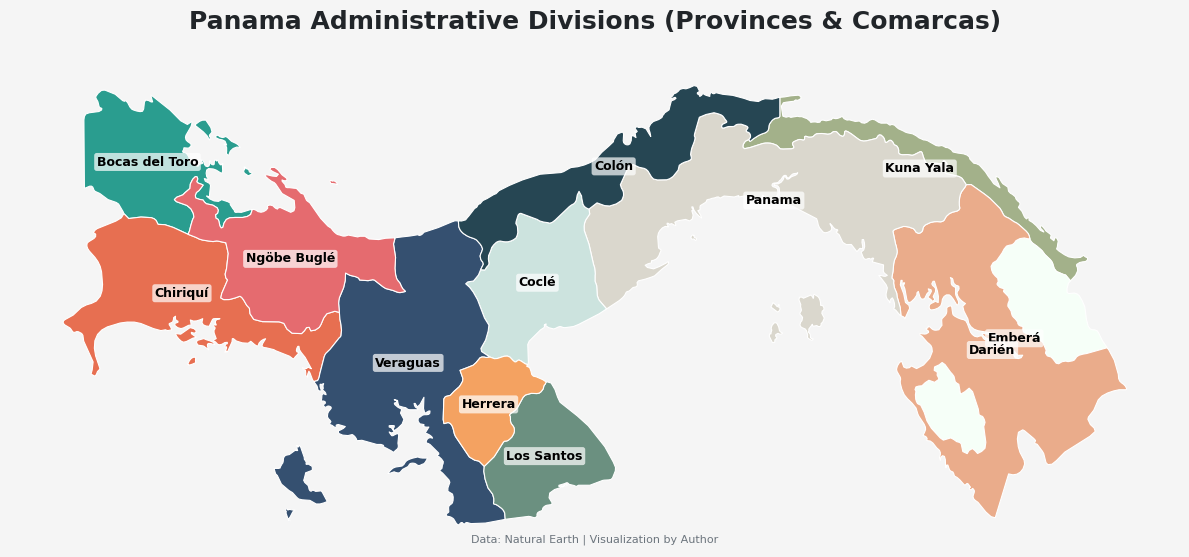

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import random

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)

panama = admin1[admin1['admin'] == 'Panama']
panama = panama.to_crs("EPSG:32617")

colors = [
    "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",
    "#3a5a78", "#588157", "#a3b18a", "#dad7cd", "#6b9080",
    "#6d597a", "#b56576", "#e56b6f", "#eaac8b", "#355070",
    "#a4c3b2", "#cce3de", "#f6fff8", "#eae0d5", "#0a0908"
]

random.shuffle(colors)

fig, ax = plt.subplots(figsize=(12, 10))

panama.plot(
    ax=ax,
    column='name',
    cmap=plt.cm.colors.ListedColormap(colors),
    edgecolor='white',
    linewidth=0.8,
    legend=False
)

for x, y, label in zip(panama.geometry.centroid.x,
                       panama.geometry.centroid.y,
                       panama['name']):
    ax.text(
        x, y, label,
        fontsize=9,
        ha='center',
        va='center',
        fontfamily='sans-serif',
        fontweight='bold',
        color='black',
        bbox=dict(
            facecolor='white',
            alpha=0.7,
            edgecolor='none',
            boxstyle='round,pad=0.2'
        )
    )

ax.set_title(
    'Panama Administrative Divisions (Provinces & Comarcas)',
    fontsize=18,
    pad=25,
    fontweight='bold',
    color='#212529',
    fontfamily='sans-serif',
    linespacing=1.5
)

fig.patch.set_facecolor('#f5f5f5')  
ax.set_facecolor('#f5f5f5') 

ax.add_patch(plt.Rectangle(
    (panama.total_bounds[0] - 50000, panama.total_bounds[1] - 50000),
    panama.total_bounds[2] - panama.total_bounds[0] + 100000,
    panama.total_bounds[3] - panama.total_bounds[1] + 100000,
    fill=False,
    edgecolor='#adb5bd',
    linewidth=0.5,
    linestyle='--',
    alpha=0.7
))

ax.text(
    0.5, 0.01,
    'Data: Natural Earth | Visualization by Author',
    transform=ax.transAxes,
    fontsize=8,
    color='#6c757d',
    ha='center',
    fontfamily='sans-serif',
    bbox=dict(
        facecolor='#f5f5f5',
        alpha=0.8,
        edgecolor='none',
        pad=3
    )
)

ax.set_axis_off()

plt.tight_layout()
plt.show()

In [19]:
import folium
import geopandas as gpd
import random

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)
panama = admin1[admin1['admin'] == 'Panama']

panama = panama.to_crs("EPSG:4326")

colors = [
    "#1D3557", "#2A9D8F", "#F4A261", "#E76F51", "#264653",
    "#3A5A78", "#588157", "#A3B18A", "#4B8C4A", "#9D5B62",
    "#6D597A", "#E56B6F", "#355070", "#A4C3B2", "#C6AC8F",
    "#5F6366", "#344E41", "#8E9A4D", "#F1F6F9", "#B9D6D7"
]

random.shuffle(colors)

m = folium.Map(
    location=[8.5, -80.0],
    zoom_start=7,
    tiles='CartoDB positron'
)

folium.GeoJson(
    panama,
    name='Panama Provinces',
    style_function=lambda feature: {
        'fillColor': colors.pop(),
        'color': 'white',
        'weight': 1,
        'fillOpacity': 0.6
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name', 'type'],
        aliases=['Name:', 'Type:'],
        localize=True
    )
).add_to(m)

folium.LayerControl().add_to(m)

m